###### Get properties.csv file

In [189]:
import pandas as pd
import json, os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import time, logging
import boto3,json

prop_filepath = os.getcwd() + "/properties_2016.csv"
property_df = pd.read_csv(prop_filepath)
property_df.head(3)

C:\Users\smits_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


###### Get train_2016_v2.csv file

In [190]:
train_filepath = os.getcwd() + "/train_2016_v2.csv"
train_df = pd.read_csv(train_filepath)


###### Merge both propertries and train files

In [191]:
merged_df = pd.merge(train_df,property_df,on="parcelid",how="left")
#merged_df.head(3).transpose()
#merged_df

###### Get information on missing values columns and plot its distribution

In [192]:
missing_values_df = merged_df.isnull().sum(axis=0)/len(merged_df.index)*100
#missing_values_df.reset_index()

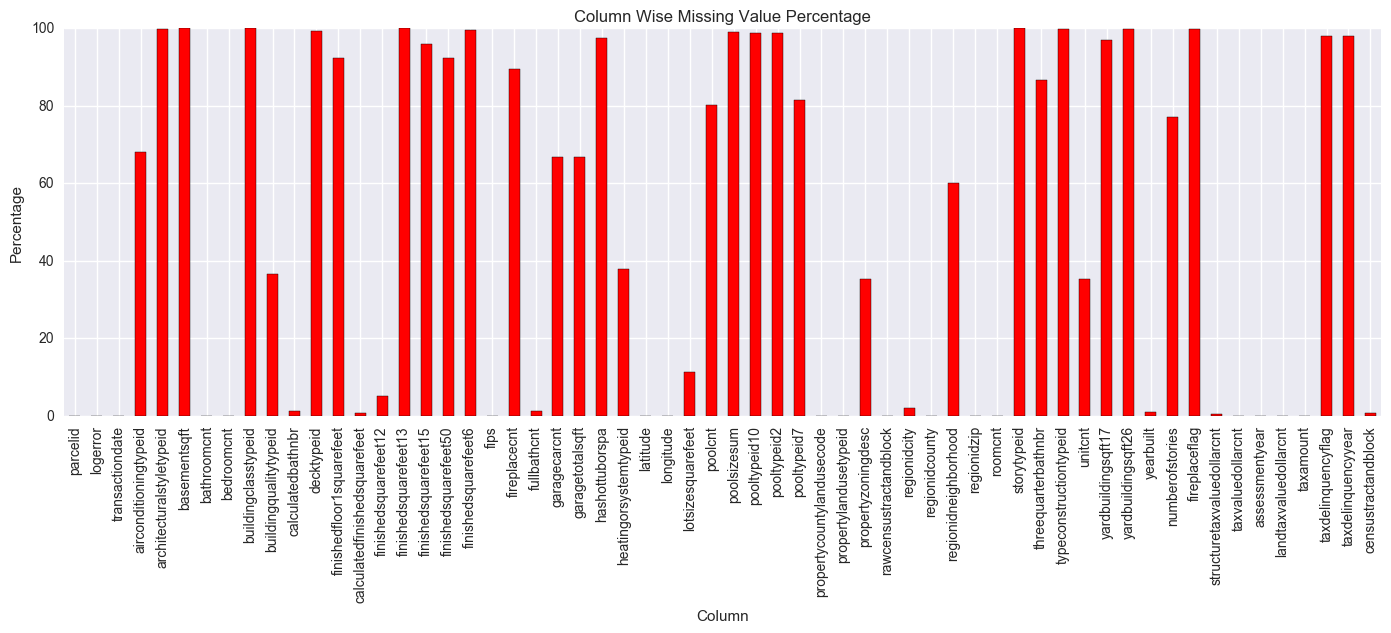

In [193]:
%matplotlib inline
missing_values_df = merged_df.isnull().sum(axis=0)/len(merged_df.index) * 100
my_plot = missing_values_df.plot(kind='bar',title='Column Wise Missing Value Percentage',figsize=(17, 5), color='red')
my_plot.set_xlabel('Column')
my_plot.set_ylabel('Percentage')

###### Remove missing value columns 

In [194]:
not_needed = missing_values_df.reset_index()
not_needed.columns = ['Column', 'Percentange']
not_needed.ix[not_needed['Percentange']> 80.00]

C:\Users\smits_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


,Column,Percentange
4,architecturalstyletypeid,99.710883
5,basementsqft,99.952368
8,buildingclasstypeid,99.982276
11,decktypeid,99.271116
12,finishedfloor1squarefeet,92.405428
15,finishedsquarefeet13,99.963445
16,finishedsquarefeet15,96.052063
17,finishedsquarefeet50,92.405428
18,finishedsquarefeet6,99.533647
20,fireplacecnt,89.358073


In [195]:
merged_df['pooltypeid10'] = merged_df['pooltypeid10'].fillna(0)
merged_df['pooltypeid10'] = merged_df['pooltypeid10'].replace(1, 10)
merged_df['pooltypeid10'].unique()

array([  0.,  10.])

In [196]:
merged_df['pooltypeid2'] = merged_df['pooltypeid2'].fillna(0)
merged_df['pooltypeid2'] = merged_df['pooltypeid2'].replace(1, 2)
property_df['pooltypeid2'].unique()

array([ nan,   1.])

In [197]:
merged_df['pooltypeid7'] = merged_df['pooltypeid7'].fillna(0)
merged_df['pooltypeid7'] = merged_df['pooltypeid7'].replace(1, 7)
merged_df['pooltypeid7'].unique()

array([ 0.,  7.])

In [198]:
merged_df['pooltypeid'] = merged_df[['pooltypeid10','pooltypeid2','pooltypeid7']].sum(axis=1)
merged_df['pooltypeid'].unique()

array([  0.,   7.,  10.,   2.])

In [199]:
a= merged_df.drop(merged_df.columns[[3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,40,43,44,45,46,47,48,50,51,57,58,59]], axis=1)  # df.columns is zero-based pd.Index 
a.shape

(90275, 19)

In [200]:
a.head(3)

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,latitude,longitude,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,pooltypeid
0,11016594,0.0276,2016-01-01,2.0,3.0,34280990.0,-118488536.0,6.037107e+07,12447.0,3101.0,96370.0,0.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,0.0
1,14366692,-0.1684,2016-01-01,3.5,4.0,33668120.0,-117677556.0,6.059052e+07,32380.0,1286.0,96962.0,0.0,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,0.0
2,12098116,-0.0040,2016-01-01,3.0,2.0,34136312.0,-118175032.0,6.037464e+07,47019.0,3101.0,96293.0,0.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,0.0


In [201]:
a.shape

(90275, 19)

###### Get type of pooltype and plot its distribution

In [202]:
pool_df = pd.DataFrame(a['pooltypeid'].value_counts())
pool_df.columns = ['Count']
pool_df

,Count
0.0,71213
7.0,16697
2.0,1204
10.0,1161


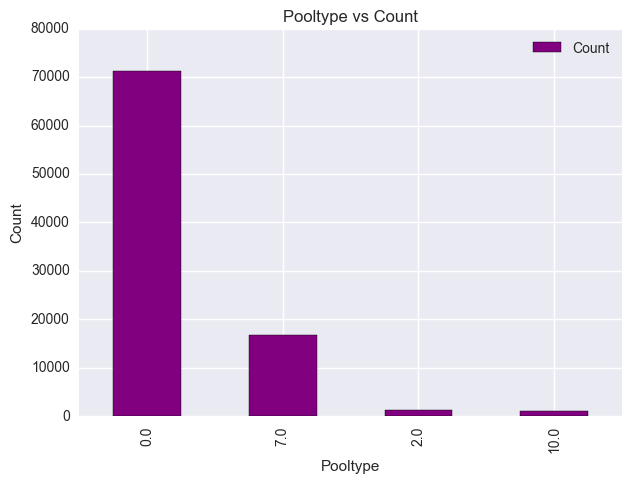

In [203]:
plot = pool_df.plot(kind='bar',title='Pooltype vs Count',figsize=(7, 5), color='purple')
plot.set_xlabel('Pooltype')
plot.set_ylabel('Count')

###### Data Wrangling

In [204]:
a['parcelid'] = a['parcelid'].astype(int)

In [205]:
a = a.dropna(subset=['regionidzip'])

In [206]:
a = a.dropna(subset=['yearbuilt'])

In [207]:
a = a.dropna(subset=['structuretaxvaluedollarcnt'])

In [208]:
data_to_csv = a.dropna(subset=['regionidcity'])

###### plot yearbuilt distribution as a scatter plot

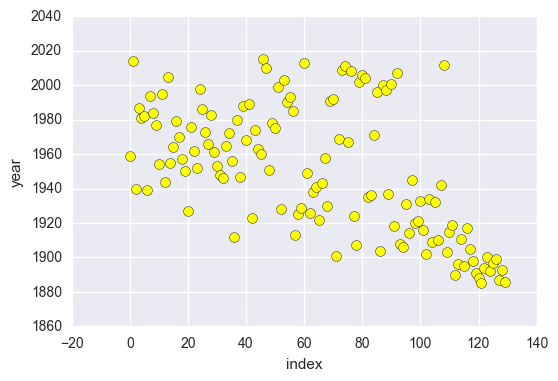

In [209]:
yeardf = data_to_csv['yearbuilt'].unique()
yeardf = pd.DataFrame(yeardf)
yeardf = yeardf.reset_index()
yeardf.columns = ['index', 'year']
yeardf.plot(kind='scatter', x='index', y='year', s=50, color='yellow')

###### Get minimum and maximum of logerror and plot its distribution in box plot

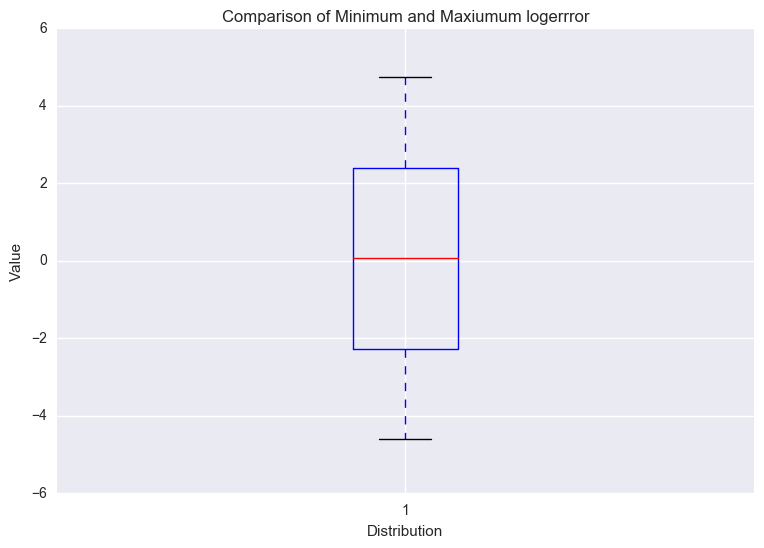

In [210]:
min_logerror = data_to_csv['logerror'].min()
max_logerror = data_to_csv['logerror'].max()
box_plot = [min_logerror, max_logerror]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(box_plot)
ax.set_title('Comparison of Minimum and Maxiumum logerrror')
ax.set_xlabel('Distribution')
ax.set_ylabel('Value')
plt.show()

###### Plot logerror distribution, remove outliers and plot its distribution

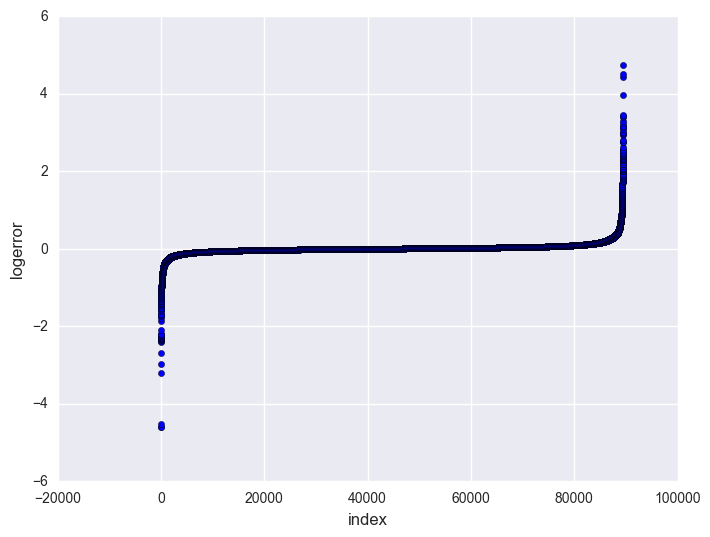

In [211]:
plt.figure(figsize=(8,6))
plt.scatter(range(a.shape[0]), np.sort(a.logerror.values))
plt.xlabel('index', fontsize= 12)
plt.ylabel('logerror', fontsize=12)
plt.show()

C:\Users\smits_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()
C:\Users\smits_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


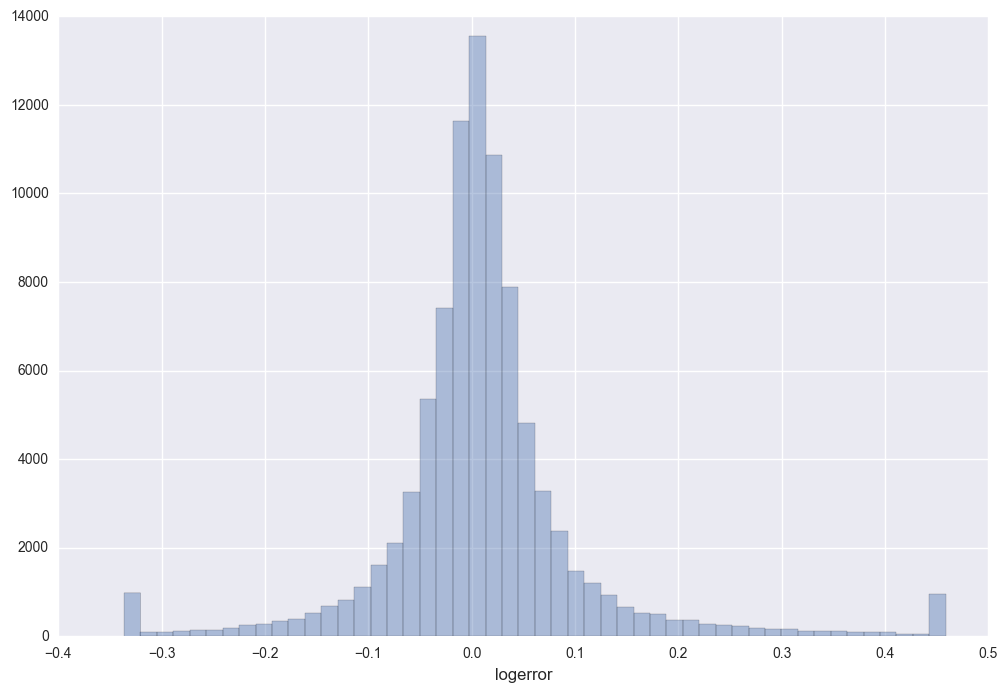

In [212]:
ulimit = np.percentile(a.logerror.values, 99)
llimit = np.percentile(a.logerror.values, 1)
a['logerror'].ix[a['logerror']>ulimit] = ulimit
a['logerror'].ix[a['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(a.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

###### Get number of transactions per month and plot its distribution

In [213]:
a['transactiondate']= pd.to_datetime(a['transactiondate'])
a['transaction_month'] = a['transactiondate'].dt.month
cnt_srs = a['transaction_month'].value_counts()

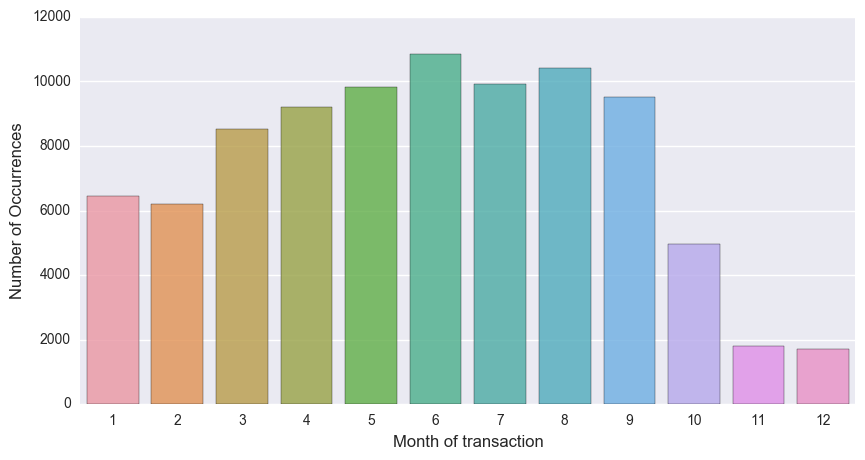

In [214]:
plt.figure(figsize=(10,5))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

###### convert latitude and longitude in valid values and plot its distribution

In [215]:
data_to_csv['latitude'] = data_to_csv['latitude']/1000000

C:\Users\smits_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [216]:
data_to_csv['longitude'] = data_to_csv['longitude']/1000000


C:\Users\smits_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


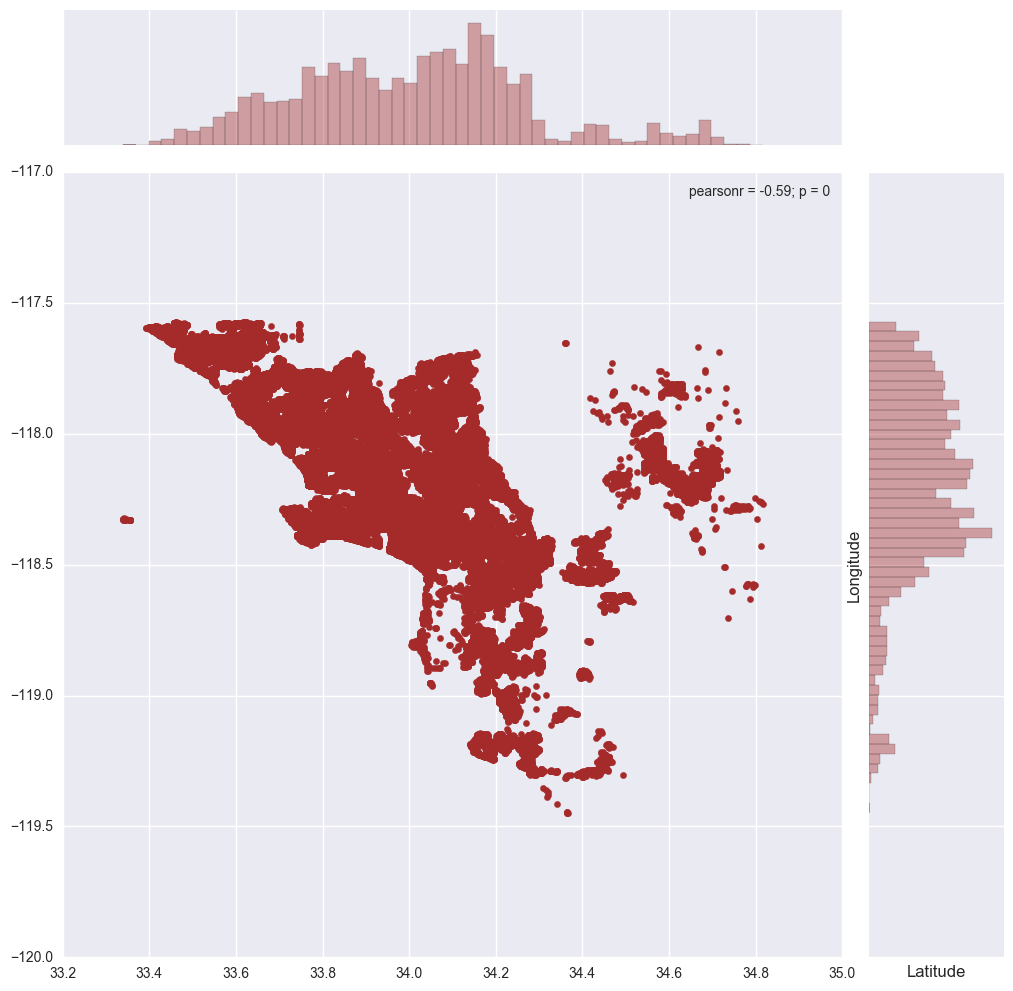

In [217]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data_to_csv.latitude.values, y=data_to_csv.longitude.values, size=10, color='brown')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

###### Get new cleaned dataframe in Clean.csv 

In [218]:
cwd = os.getcwd()
filename = cwd + '\Clean.csv'
data_to_csv.to_csv(filename, index= False, encoding='utf-8')

In [ ]:
logfile=time.strftime('%d/%m/%Y') + ".log"
logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',filename=logfile, datefmt='%m/%d/%Y %I:%M:%S %p',level=logging.INFO)

#Load config file
config = json.load(open('config.json'))
accesskey =  config['AWSAccess']
secretkey = config['AWSSecret']


#Create a connection
s3 = boto3.resource('s3',
                    aws_access_key_id =  accesskey, 
                    aws_secret_access_key =  secretkey)
                   
#Create bucket if required
for bucket in s3.buckets.all():
    if bucket.name != 'ZillowData':
        s3.create_bucket(Bucket='ZillowData')
        logging.info('Bucket created')
        
#Upload data to bucket
file_to_upload = open("Clean.csv", 'rb')
s3.Bucket('ZillowData').put_object(Key="Clean.csv", Body=file_to_upload)
logging.info('Clean.csv File uploaded')